In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
ls

Notes.ipynb  README.md  test_image.jpg


# openCV

In [7]:
image=cv2.imread("test_image.jpg")

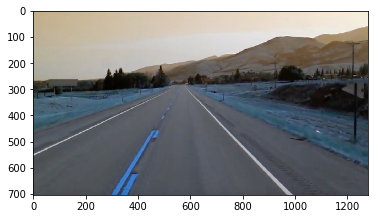

In [10]:
plt.imshow(image)

# Greyscale conversion

edge detection = identifying sharp changes of intensity in adjacent pixels

pixel intensity from 0 (black) to 255 (white)

In [14]:
lane_image=np.copy(image)
gray=cv2.cvtColor(lane_image,cv2.COLOR_RGB2GRAY)
#more straightforward way ?

In [17]:
lane_image

array([[[116,  91,  75],
        [194, 174, 134],
        [194, 174, 134],
        ...,
        [248, 238, 215],
        [248, 238, 215],
        [248, 238, 215]],

       [[157, 133, 106],
        [194, 174, 134],
        [194, 174, 134],
        ...,
        [247, 238, 215],
        [247, 238, 215],
        [247, 238, 215]],

       [[185, 163, 127],
        [194, 174, 134],
        [194, 174, 134],
        ...,
        [247, 238, 215],
        [247, 238, 215],
        [247, 238, 215]],

       ...,

       [[ 74,  80,  85],
        [ 74,  80,  85],
        [ 74,  80,  85],
        ...,
        [ 73,  74,  82],
        [ 73,  74,  82],
        [ 73,  74,  82]],

       [[ 74,  80,  85],
        [ 74,  80,  85],
        [ 74,  80,  85],
        ...,
        [ 72,  73,  81],
        [ 72,  73,  81],
        [ 72,  73,  81]],

       [[ 74,  80,  85],
        [ 74,  80,  85],
        [ 74,  80,  85],
        ...,
        [ 72,  73,  81],
        [ 72,  73,  81],
        [ 72,  73,  81]]

In [18]:
gray

array([[ 97, 175, 175, ..., 238, 238, 238],
       [137, 175, 175, ..., 238, 238, 238],
       [165, 175, 175, ..., 238, 238, 238],
       ...,
       [ 79,  79,  79, ...,  75,  75,  75],
       [ 79,  79,  79, ...,  74,  74,  74],
       [ 79,  79,  79, ...,  74,  74,  74]], dtype=uint8)

In [23]:
gray.shape

(704, 1279)

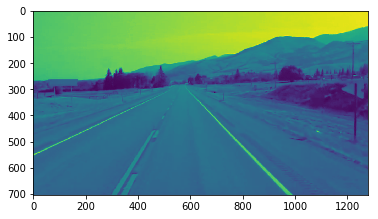

In [28]:
plt.imshow(gray)

# Gaussian blur
Apply convolutional kernel 5 by 5 : good kernel

In [19]:
blur=cv2.GaussianBlur(gray,(5,5),0)
# last option is deviation of the blur

In [24]:
blur.shape #same shape

(704, 1279)

In [22]:
blur

array([[156, 163, 172, ..., 238, 238, 238],
       [161, 165, 173, ..., 238, 238, 238],
       [168, 170, 174, ..., 238, 238, 238],
       ...,
       [ 79,  79,  79, ...,  75,  75,  75],
       [ 79,  79,  79, ...,  74,  74,  74],
       [ 79,  79,  79, ...,  74,  74,  74]], dtype=uint8)

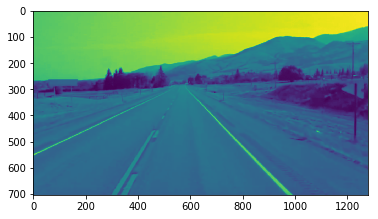

In [29]:
plt.imshow(blur)

# Canny
computes gradient and keeps largest gradients as white pixels

In [25]:
canny=cv2.Canny(blur,50,150)
#last 2 item : low & high thresholds
# investigate

In [26]:
canny

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

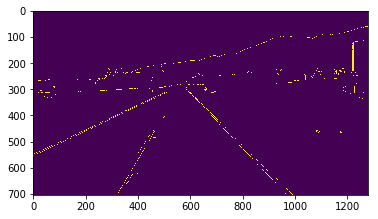

In [30]:
plt.imshow(canny)

# creating function

In [31]:
def canny(image):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    canny=cv2.Canny(blur,50,150)
    return canny

# focus on region of interest
triangle containing the lines